<a href="https://colab.research.google.com/github/SkShoheb33/MyProjects/blob/main/MyBrainTumourProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')
import tensorflow as tf
from tensorflow.keras import layers,models,optimizers,preprocessing
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout


In [154]:
main_dir = "/content/gdrive/MyDrive/BrainTumour/"
classification_dirs = [("no_tumor",), ("meningioma_tumor",)]
resolution = 64

def load_images(root_dir_name):
    x = []
    y = []
    
    for label, sub_dir_names in enumerate(classification_dirs):
        for sub_dir_name in sub_dir_names:
            print(f"loading {root_dir_name} {sub_dir_name}")
            sub_dir_path = os.path.join(main_dir, root_dir_name, sub_dir_name)
            for image_name in os.listdir(sub_dir_path):
                image_path = os.path.join(sub_dir_path, image_name)
                image = preprocessing.image.load_img(image_path, color_mode="grayscale", target_size=(resolution, resolution))
                x.append(preprocessing.image.img_to_array(image))
                y.append(label)
    
    x = np.array(x) / 255.0
    y = np.array(y)
    
    return x, y
    return x, y


In [155]:
x_train, y_train = load_images("Training")
x_test, y_test = load_images("Testing")

loading Training no_tumor
loading Training meningioma_tumor
loading Testing no_tumor
loading Testing meningioma_tumor


In [156]:
x_train.shape

(1217, 64, 64, 1)

In [157]:
x_test.shape

(220, 64, 64, 1)

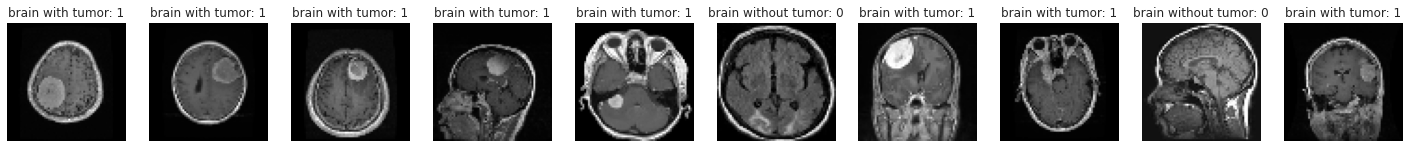

In [158]:
c = 10

fig, subplots = plt.subplots(1, c)
fig.set_size_inches(25, 3)
for i in range(c):
    n = np.random.randint(0, len(x_train))
    num = y_train[n]
    word = "out" if num == 0 else "" 
    
    subplots[i].imshow(x_train[n].reshape((resolution, resolution)), cmap="gray")
    subplots[i].set_title(f"brain with{word} tumor: {num}")
    subplots[i].axis("off")
plt.show()

In [159]:
input_shape = (64,64,1)
model = models.Sequential()
model.add(Conv2D(32,kernel_size = (2,2),strides = (1,1),activation = 'linear',input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(64,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(128,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(256,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(512,kernel_size = (2,2),strides = (1,1),activation = 'linear'))
model.add(MaxPooling2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation="linear"))
model.add(Dense(1, activation="sigmoid"))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 63, 63, 32)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        8256      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       32896     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)       

In [160]:
model.compile(optimizer = 'rmsprop',loss = "binary_crossentropy",metrics = ['accuracy'])

In [161]:
history = model.fit(x_train,y_train,batch_size = 5,epochs = 20, validation_data=(x_test, y_test))

Epoch 1/20
244/244 [==============================] - 3s 7ms/step - loss: 0.6120 - accuracy: 0.6886 - val_loss: 0.6983 - val_accuracy: 0.6045
Epoch 2/20
244/244 [==============================] - 1s 6ms/step - loss: 0.3583 - accuracy: 0.8529 - val_loss: 0.6376 - val_accuracy: 0.7045
Epoch 3/20
244/244 [==============================] - 1s 6ms/step - loss: 0.2479 - accuracy: 0.9006 - val_loss: 0.5444 - val_accuracy: 0.7364
Epoch 4/20
244/244 [==============================] - 1s 6ms/step - loss: 0.1771 - accuracy: 0.9334 - val_loss: 0.1449 - val_accuracy: 0.9455
Epoch 5/20
244/244 [==============================] - 1s 6ms/step - loss: 0.1030 - accuracy: 0.9663 - val_loss: 0.1220 - val_accuracy: 0.9636
Epoch 6/20
244/244 [==============================] - 1s 6ms/step - loss: 0.0708 - accuracy: 0.9753 - val_loss: 0.0366 - val_accuracy: 0.9864
Epoch 7/20
244/244 [==============================] - 1s 6ms/step - loss: 0.0631 - accuracy: 0.9852 - val_loss: 0.0716 - val_accuracy: 0.9773
Epoch 

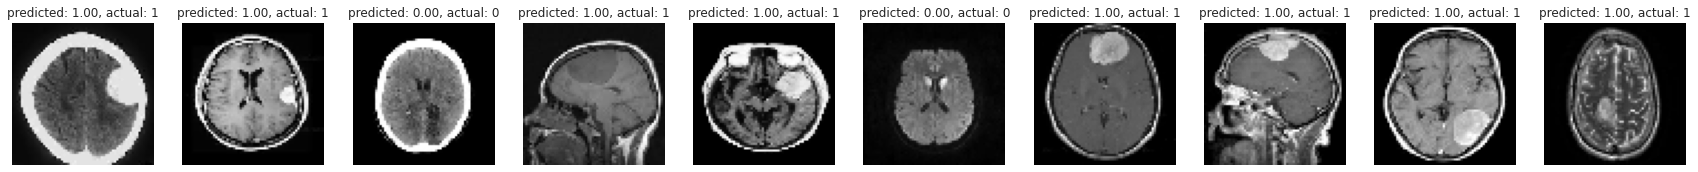

In [162]:
y_test_results = model.predict(x_test)

c = 10
fig, subplots = plt.subplots(1, c)
fig.set_size_inches(30, 9)
for i in range(c):
    n = np.random.randint(0, len(x_test))
    guess = str(round(y_test_results[n][0], 2)).ljust(4, "0")
    actual = y_test[n]

    subplot = subplots[i]
    subplot.imshow(x_test[n].reshape((resolution, resolution)), cmap="gray")
    subplot.set_title(f"predicted: {guess}, actual: {actual}")
    subplot.axis("off")
plt.show()


Text(0.5, 1.0, 'Loss vs Epochs')

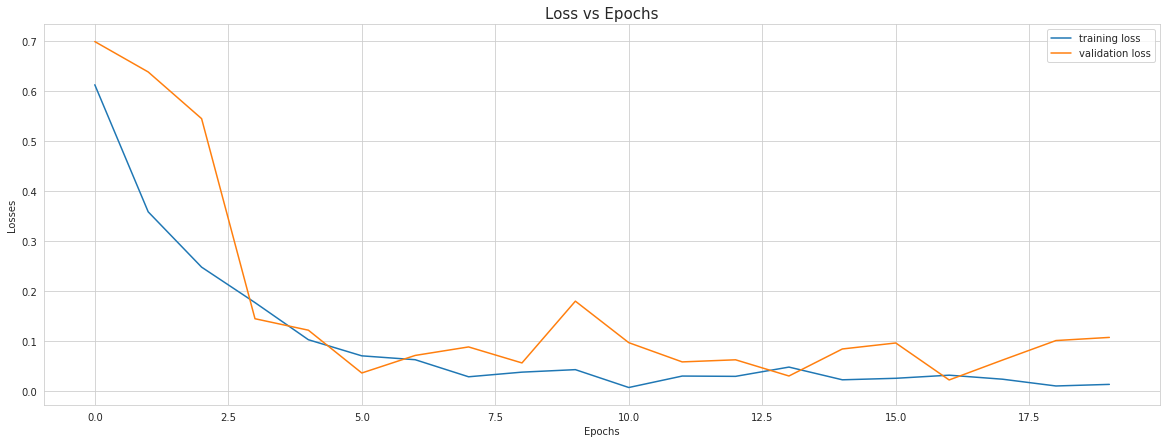

In [163]:
plt.figure(figsize = (20,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Loss vs Epochs', fontsize = 15)

Text(0.5, 1.0, 'Accuracy vs Epochs')

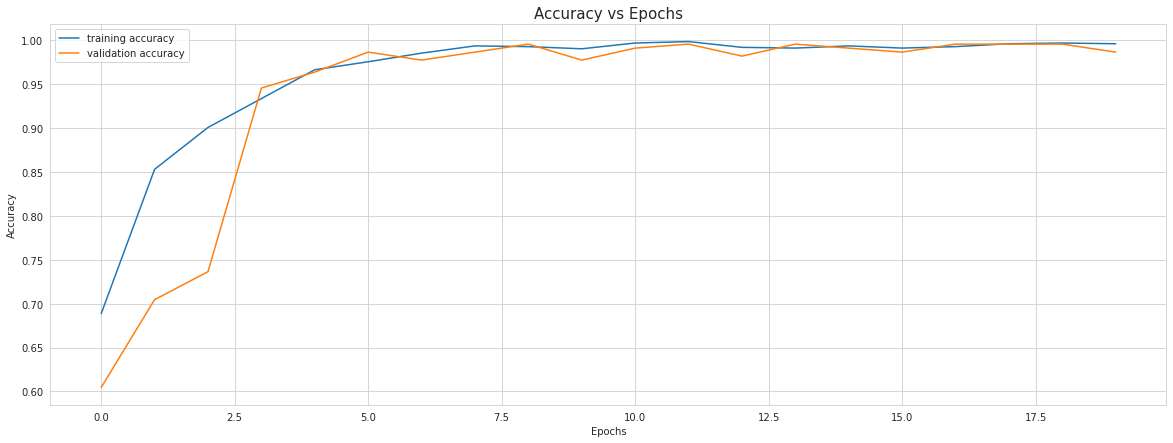

In [164]:
plt.figure(figsize = (20,7))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs', fontsize = 15)

In [165]:
y_test_results = np.round(y_test_results)

In [166]:
from sklearn.metrics import accuracy_score, classification_report
#print(y_test_results,y_test)
print('Accuracy : ' + str(round(accuracy_score(y_test, y_test_results)*100,2))+'%')
#print(classification_report(y_test, pred, target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']))

Accuracy : 98.64%


In [167]:
#print(classification_report(y_test, pred, target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']))
#print(classification_report(np.argmax(y_test, axis =1),np.argmax(y_test_results,axis=1),target_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']))